#LaLiga Data Analysis with PyMC
Introduction
In this notebook, we'll perform Bayesian data analysis using the PyMC library. We'll explore a dataset, visualize the data, and then apply Bayesian modeling to draw inferences and perform a prediction for the next season.

Loading Libraries
Let's start by importing the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import math
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
drive_path = '/content/drive/My Drive/Colab Notebooks'
contents = os.listdir(drive_path)
contents

['LaLiga_Matches.csv',
 'Untitled3.ipynb',
 'Untitled3333.ipynb',
 'Untitled777777.ipynb',
 'Untitled8888888.ipynb',
 'Untitled0.ipynb',
 'DS_FinalProject.ipynb']

# Loading LaLiga Matches Data
Now, let's load the LaLiga matches data from the CSV file.

In [ ]:
goals_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LaLiga_Matches.csv', usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG'])

#If we are loading the notebook on jupyter lab use below command to load the data
#goals_df=pd.read_csv('data/LaLiga_Matches.csv', usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG'])

In [ ]:
goals_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG
0,02-09-1995,La Coruna,Valencia,3,0,2.0,0.0
1,02-09-1995,Sp Gijon,Albacete,3,0,3.0,0.0
2,03-09-1995,Ath Bilbao,Santander,4,0,2.0,0.0
3,03-09-1995,Ath Madrid,Sociedad,4,1,1.0,1.0
4,03-09-1995,Celta,Compostela,0,1,0.0,0.0


# Creating Team Index Lookup for LaLiga Matches


In this section, we'll create a team index lookup for LaLiga matches based on the unique team names. This will help us map team names to corresponding indices.

## Generating Team Names and Indices
Let's start by generating a list of all unique team names and a list of corresponding indices.

In [ ]:
teams = goals_df['HomeTeam'].unique()  #generate list of all unique team names
team_indices = list(range(0,len(teams)))    #generate list of indices of suitable range
teams_dicttionary = dict(zip(teams,team_indices))  #generate a dictionary of indices and team names

def team_identifier(team_name):                         #lookup the index for a specific team name
    index = teams_dicttionary[team_name]
    return index

# Applying Team Lookup to LaLiga Matches DataFrame


In this section, we'll apply the team lookup function to the LaLiga matches DataFrame. This will replace the team names with corresponding indices, facilitating further analysis.

## Creating a Copy of the DataFrame
Let's start by creating a copy of the original DataFrame.


In [ ]:
goals_in_df = goals_df.copy()
goals_in_df['HomeTeam'] = goals_df['HomeTeam'].apply(team_identifier)  #apply the lookup on the home team names
goals_in_df['AwayTeam'] = goals_df['AwayTeam'].apply(team_identifier)  #apply the lookup on the away team names

# Top 10 Teams with Most Average Home and Away Goals for First Half

In this section, we'll identify and visualize the top 10 teams with the most average home goals and away goals during the first-half in LaLiga matches.

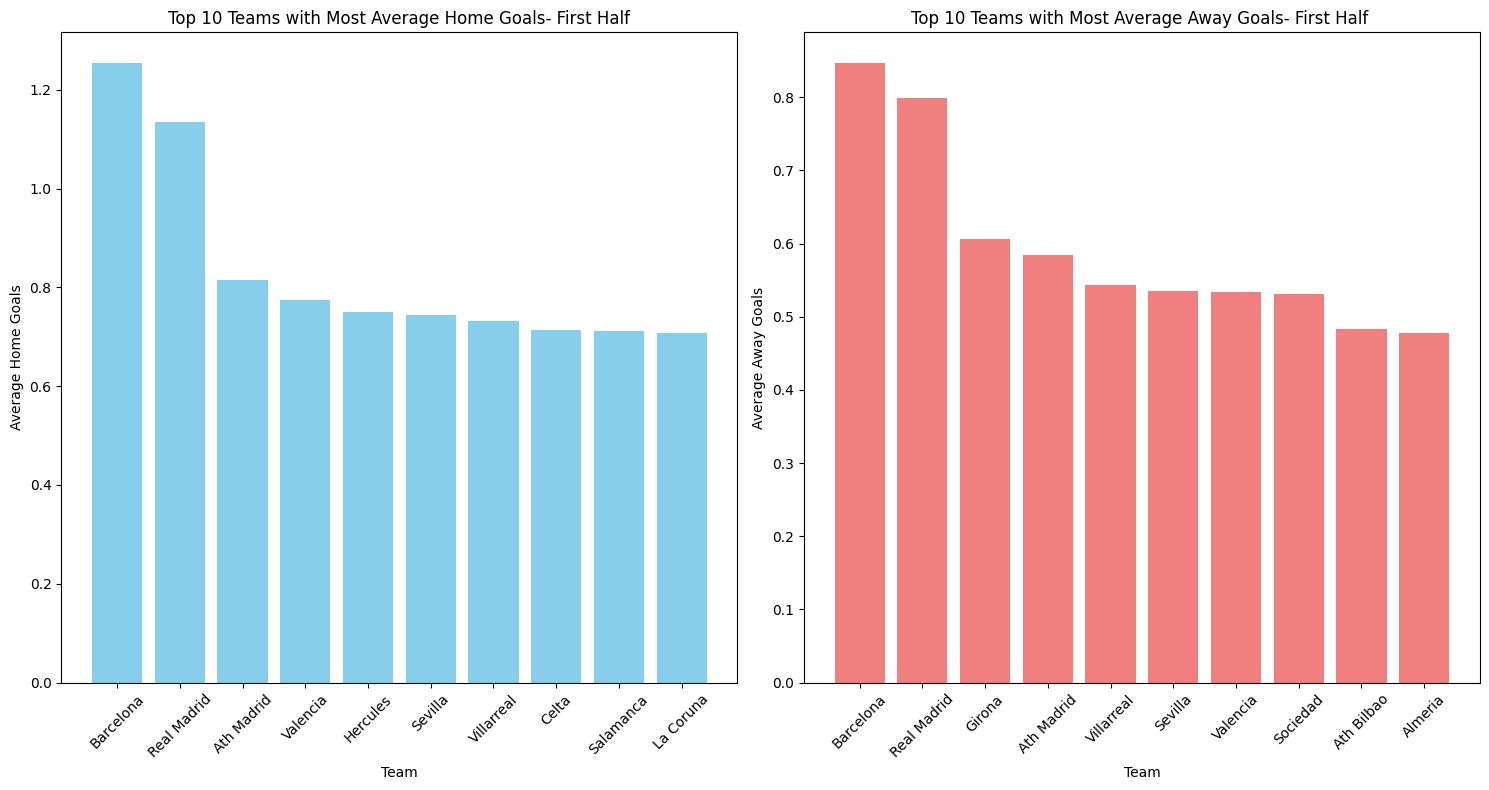

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined team_names using goals_df['HomeTeam'].unique()

# Grouping by HomeTeam and calculating the average HTHG for each team
average_ht_home_goals = goals_in_df.groupby('HomeTeam')['HTHG'].mean()

# Selecting the top 10 teams based on average HTHG for home goals
top_10_home_teams = average_ht_home_goals.nlargest(10)

# Grouping by AwayTeam and calculating the average HTAG for each team
average_ht_away_goals = goals_in_df.groupby('AwayTeam')['HTAG'].mean()

# Selecting the top 10 teams based on average HTAG for away goals
top_10_away_teams = average_ht_away_goals.nlargest(10)

# Creating DataFrames with team names and average goals
team_names_df = pd.DataFrame({'Team': teams})

# Filtering the team names for the top 10 home and away teams
top_10_home_team_names = team_names_df.loc[top_10_home_teams.index, 'Team']
top_10_away_team_names = team_names_df.loc[top_10_away_teams.index, 'Team']

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting the bar chart for the top 10 teams with most home goals

axes[0].bar(top_10_home_team_names, top_10_home_teams, color='skyblue')
axes[0].set_title('Top 10 Teams with Most Average Home Goals- First Half')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Average Home Goals')
axes[0].tick_params(axis='x', rotation=45)


# Plotting the bar chart for the top 10 teams with most away goals

axes[1].bar(top_10_away_team_names, top_10_away_teams, color='lightcoral')
axes[1].set_title('Top 10 Teams with Most Average Away Goals- First Half ')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Average Away Goals')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



# Top 10 Teams with Most Average Home and Away Goals for Second Half

In this section, we'll identify and visualize the top 10 teams with the most average home goals and away goals during the second-half in LaLiga matches.

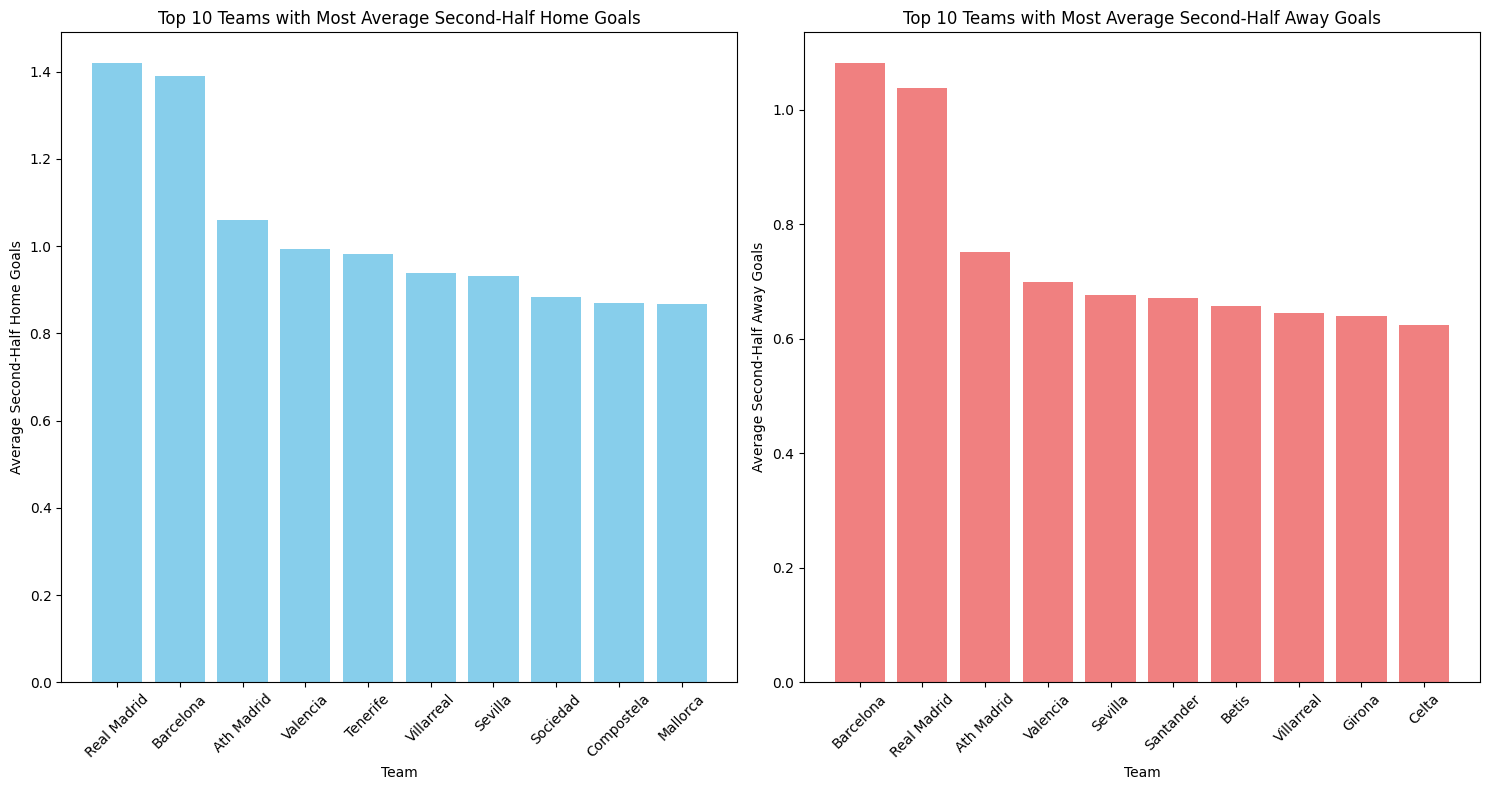

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined team_names using goals_df['HomeTeam'].unique()

# Calculate the second half goals by subtracting the first-half goals from full-time goals
goals_in_df['HTHG'] = goals_in_df['FTHG'] - goals_in_df['HTHG']
goals_in_df['HTAG'] = goals_in_df['FTAG'] - goals_in_df['HTAG']

# Grouping by HomeTeam and calculating the average second-half HTHG for each team
average_ht_home_second_half_goals = goals_in_df.groupby('HomeTeam')['HTHG'].mean()

# Selecting the top 10 teams based on average second-half HTHG for home goals
top_10_home_second_half_teams = average_ht_home_second_half_goals.nlargest(10)

# Grouping by AwayTeam and calculating the average second-half HTAG for each team
average_ht_away_second_half_goals = goals_in_df.groupby('AwayTeam')['HTAG'].mean()

# Selecting the top 10 teams based on average second-half HTAG for away goals
top_10_away_second_half_teams = average_ht_away_second_half_goals.nlargest(10)

# Creating DataFrames with team names and average second-half goals
team_names_df = pd.DataFrame({'Team': teams})

# Filtering the team names for the top 10 home and away second-half teams
top_10_home_second_half_team_names = team_names_df.loc[top_10_home_second_half_teams.index, 'Team']
top_10_away_second_half_team_names = team_names_df.loc[top_10_away_second_half_teams.index, 'Team']

# Plotting subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting the bar chart for the top 10 teams with most average second-half home goals
axes[0].bar(top_10_home_second_half_team_names, top_10_home_second_half_teams, color='skyblue')
axes[0].set_title('Top 10 Teams with Most Average Second-Half Home Goals')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Average Second-Half Home Goals')
axes[0].tick_params(axis='x', rotation=45)  # Corrected line

# Plotting the bar chart for the top 10 teams with most average second-half away goals
axes[1].bar(top_10_away_second_half_team_names, top_10_away_second_half_teams, color='lightcoral')
axes[1].set_title('Top 10 Teams with Most Average Second-Half Away Goals')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Average Second-Half Away Goals')
axes[1].tick_params(axis='x', rotation=45)  # Corrected line

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Analysis of Top 10 Teams: First Half vs. Second Half Performance for Home and Away

In this section, we'll analyze the first-half vs. second-half performance of the top 10 teams based on average goals in LaLiga matches.


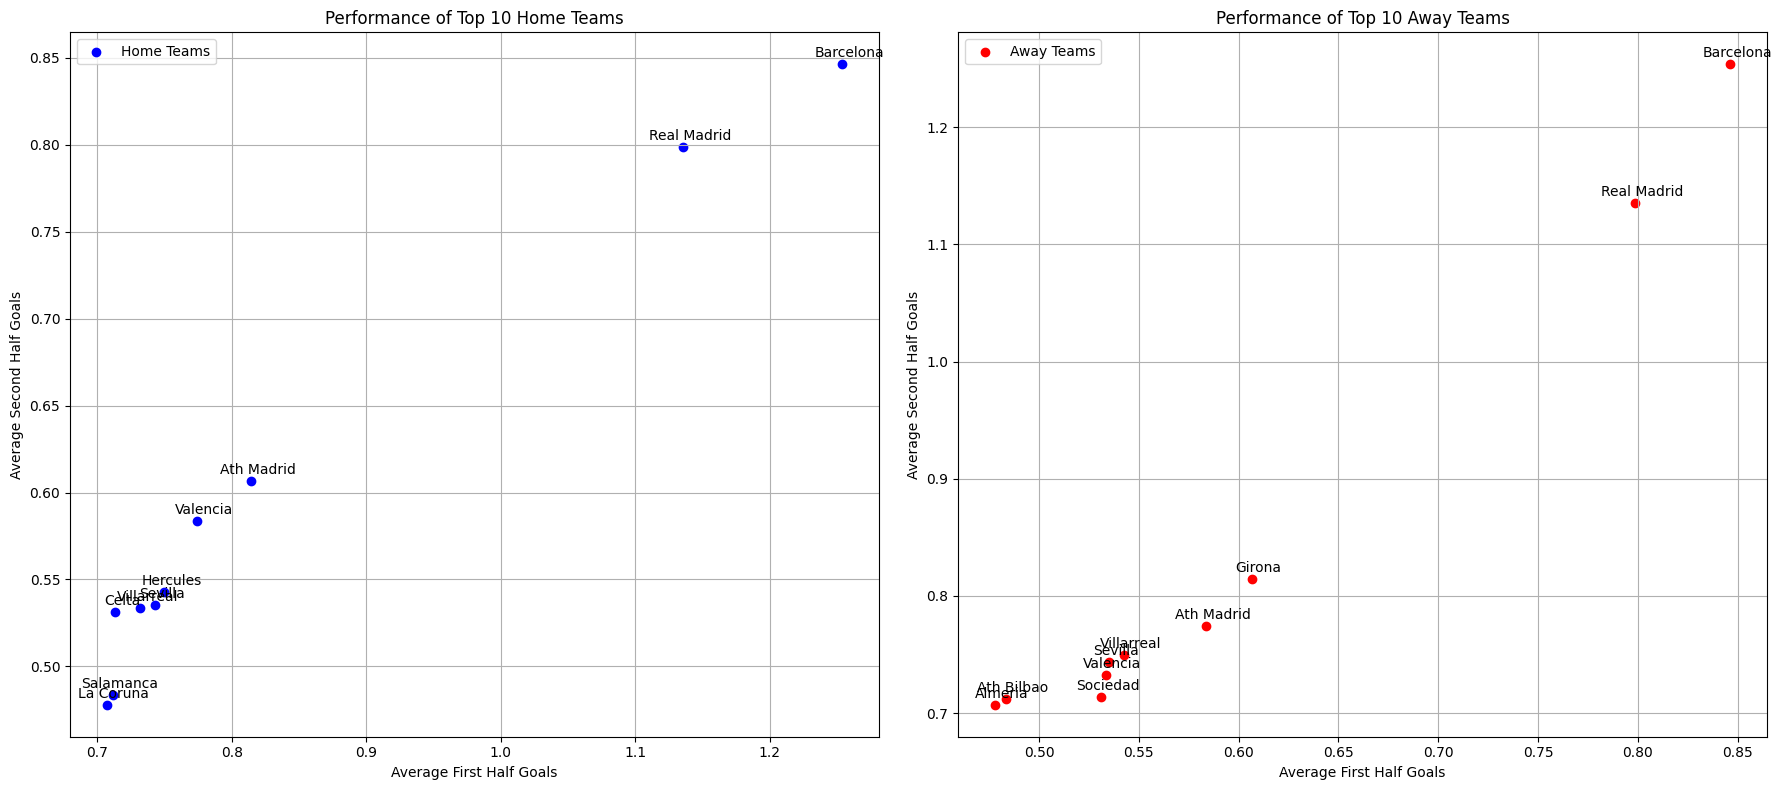

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined team_names using goals_df['HomeTeam'].unique()

# Calculate the second half goals by subtracting the first-half goals from full-time goals
goals_in_df['HTHG'] = goals_in_df['FTHG'] - goals_in_df['HTHG']
goals_in_df['HTAG'] = goals_in_df['FTAG'] - goals_in_df['HTAG']

# Grouping by HomeTeam and calculating the average HTHG for each team
average_ht_home_goals = goals_in_df.groupby('HomeTeam')['HTHG'].mean()

# Selecting the top 10 teams based on average HTHG for home goals
top_10_home_teams = average_ht_home_goals.nlargest(10)

# Grouping by AwayTeam and calculating the average HTAG for each team
average_ht_away_goals = goals_in_df.groupby('AwayTeam')['HTAG'].mean()

# Selecting the top 10 teams based on average HTAG for away goals
top_10_away_teams = average_ht_away_goals.nlargest(10)

# Creating DataFrames with team names and average goals
team_names_df = pd.DataFrame({'Team': teams})

# Filtering the team names for the top 10 home and away teams
top_10_home_team_names = team_names_df.loc[top_10_home_teams.index, 'Team']
top_10_away_team_names = team_names_df.loc[top_10_away_teams.index, 'Team']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plotting the scatter plot for home teams
axes[0].scatter(top_10_home_teams, top_10_away_teams, color='blue', label='Home Teams')
for (x, y, team) in zip(top_10_home_teams, top_10_away_teams, top_10_home_team_names):
    axes[0].annotate(team, (x, y), textcoords="offset points", xytext=(5, 5), ha='center')

axes[0].set_title('Performance of Top 10 Home Teams')
axes[0].set_xlabel('Average First Half Goals')
axes[0].set_ylabel('Average Second Half Goals')
axes[0].legend()
axes[0].grid(True)

# Plotting the scatter plot for away teams
axes[1].scatter(top_10_away_teams, top_10_home_teams, color='red', label='Away Teams')
for (x, y, team) in zip(top_10_away_teams, top_10_home_teams, top_10_away_team_names):
    axes[1].annotate(team, (x, y), textcoords="offset points", xytext=(5, 5), ha='center')

axes[1].set_title('Performance of Top 10 Away Teams')
axes[1].set_xlabel('Average First Half Goals')
axes[1].set_ylabel('Average Second Half Goals')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Statistics and DataFrame Overview


In this section, we'll calculate summary statistics and provide an overview of the modified LaLiga matches DataFrame. This includes the number of unique teams, the total number of games, and a glimpse of the modified DataFrame.

## Number of Unique Teams and Games
Let's start by calculating the number of unique teams and the total number of games.


In [ ]:
num_teams = len(teams)
num_games = len(goals_in_df)
goals_in_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG
0,02-09-1995,0,21,3,0,2.0,0.0
1,02-09-1995,1,11,3,0,3.0,0.0
2,03-09-1995,2,18,4,0,2.0,0.0
3,03-09-1995,3,19,4,1,1.0,1.0
4,03-09-1995,4,15,0,1,0.0,0.0


# Extracting Team Indices and Scores from Modified LaLiga Matches DataFrame


In this section, we'll extract team indices and scores from the modified LaLiga matches DataFrame. This allows us to analyze individual match details using team indices.

## Extracting Data
Let's start by extracting team indices and scores from the DataFrame.


In [ ]:
home_teams=goals_in_df['HomeTeam'].values
away_teams=goals_in_df['AwayTeam'].values
home_goals=goals_in_df['FTHG'].values
away_goals=goals_in_df['FTAG'].values

# Bayesian Model for LaLiga Matches


In this section, we'll define and execute a Bayesian model for LaLiga matches using PyMC. The model aims to estimate latent variables for team attack and defense strengths.

## Defining the Bayesian Model
Let's start by defining the Bayesian model using PyMC.

In [ ]:
with pm.Model() as model:
    #Define prior distributions
    attack_mu = 0
    defense_mu = 0
    attack_tau = pm.Gamma('attack_tau', alpha=0.1, beta=0.1)
    defense_tau = pm.Gamma('defense_tau', alpha=0.1, beta=0.1)
    home = pm.Normal('home', mu=0, tau=0.0001)
    #Calculate latent variables
    prime_attack = pm.Normal('prime_attack', mu=attack_mu, tau=attack_tau, shape=num_teams)
    prime_defense = pm.Normal('prime_defense', mu=defense_mu, tau=defense_tau, shape=num_teams)
    #Normalize the att and defe
    attack = pm.Deterministic('attack', prime_attack - prime_attack.mean())
    defense = pm.Deterministic('defense', prime_defense - prime_defense.mean())
    #Calculate game-specific theta values as list
    theta_Home_ls = np.exp(home + attack[home_teams] - defense[away_teams])
    theta_Away_ls = np.exp(attack[away_teams] - defense[home_teams])
    #Define Likelihood
    y_Home = pm.Poisson('y_Home', theta_Home_ls, observed=home_goals)
    y_Away = pm.Poisson('y_Away', theta_Away_ls, observed=away_goals)

In [ ]:
with model:
    trace = pm.sample(20000, tune=1000, init='adapt_diag')


In [ ]:
pm.summary(trace)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
home,0.341,0.011,0.321,0.361,0.000,0.0,38949.0,29402.0,1.0
prime_attack[0],0.125,0.047,0.039,0.214,0.001,0.0,8130.0,15065.0,1.0
prime_attack[1],-0.076,0.061,-0.191,0.040,0.001,0.0,12308.0,20473.0,1.0
prime_attack[2],0.135,0.044,0.051,0.216,0.001,0.0,7466.0,14779.0,1.0
prime_attack[3],0.335,0.043,0.253,0.415,0.001,0.0,6852.0,13827.0,1.0
...,...,...,...,...,...,...,...,...,...
defense[43],0.013,0.049,-0.078,0.103,0.000,0.0,51236.0,29658.0,1.0
defense[44],-0.100,0.095,-0.278,0.079,0.000,0.0,47370.0,28608.0,1.0
defense[45],0.083,0.062,-0.034,0.199,0.000,0.0,50453.0,30289.0,1.0
defense[46],-0.007,0.066,-0.130,0.117,0.000,0.0,53073.0,28637.0,1.0


# Trace Plot for Bayesian Model

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'home'}>,
        <Axes: title={'center': 'home'}>],
       [<Axes: title={'center': 'prime_attack'}>,
        <Axes: title={'center': 'prime_attack'}>],
       [<Axes: title={'center': 'prime_defense'}>,
        <Axes: title={'center': 'prime_defense'}>],
       [<Axes: title={'center': 'attack_tau'}>,
        <Axes: title={'center': 'attack_tau'}>],
       [<Axes: title={'center': 'defense_tau'}>,
        <Axes: title={'center': 'defense_tau'}>],
       [<Axes: title={'center': 'attack'}>,
        <Axes: title={'center': 'attack'}>],
       [<Axes: title={'center': 'defense'}>,
        <Axes: title={'center': 'defense'}>]], dtype=object)

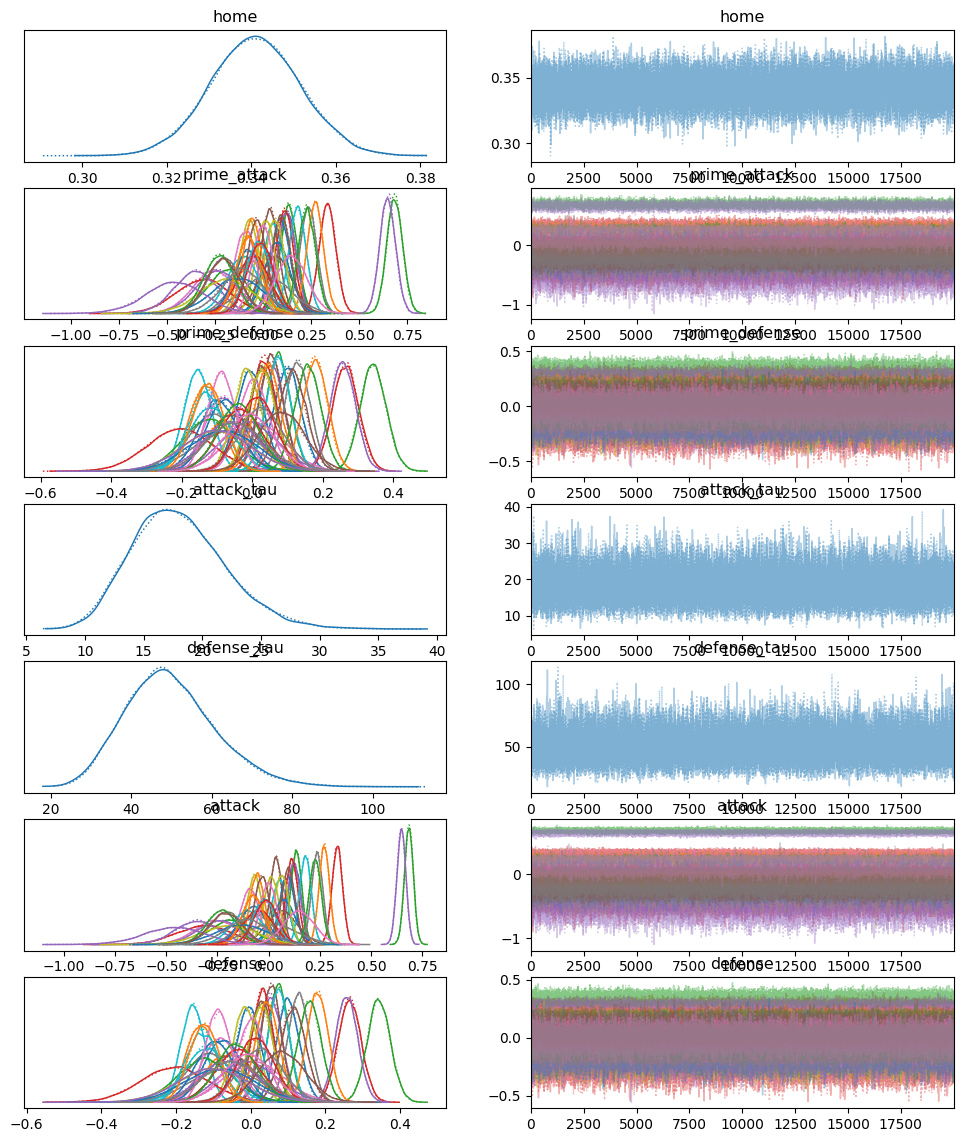

In [ ]:
pm.plot_trace(trace)

In [ ]:

print("Total number of teams :")
print(len(teams))

Total number of teams :
48


In [ ]:
teams.T

array(['La Coruna', 'Sp Gijon', 'Ath Bilbao', 'Ath Madrid', 'Celta',
       'Espanol', 'Merida', 'Sevilla', 'Valladolid', 'Vallecano',
       'Zaragoza', 'Albacete', 'Barcelona', 'Betis', 'Real Madrid',
       'Compostela', 'Oviedo', 'Salamanca', 'Santander', 'Sociedad',
       'Tenerife', 'Valencia', 'Hercules', 'Logrones', 'Extremadura',
       'Mallorca', 'Alaves', 'Villareal', 'Malaga', 'Numancia',
       'Las Palmas', 'Osasuna', 'Villarreal', 'Recreativo', 'Murcia',
       'Getafe', 'Levante', 'Cadiz', 'Gimnastic', 'Almeria', 'Xerez',
       'Granada', 'Elche', 'Eibar', 'Cordoba', 'Leganes', 'Girona',
       'Huesca'], dtype=object)

/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (195) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'home'}>,
        <Axes: title={'center': 'prime_attack\n0'}>,
        <Axes: title={'center': 'prime_attack\n1'}>,
        <Axes: title={'center': 'prime_attack\n2'}>],
       [<Axes: title={'center': 'prime_attack\n3'}>,
        <Axes: title={'center': 'prime_attack\n4'}>,
        <Axes: title={'center': 'prime_attack\n5'}>,
        <Axes: title={'center': 'prime_attack\n6'}>],
       [<Axes: title={'center': 'prime_attack\n7'}>,
        <Axes: title={'center': 'prime_attack\n8'}>,
        <Axes: title={'center': 'prime_attack\n9'}>,
        <Axes: title={'center': 'prime_attack\n10'}>],
       [<Axes: title={'center': 'prime_attack\n11'}>,
        <Axes: title={'center': 'prime_attack\n12'}>,
        <Axes: title={'center': 'prime_attack\n13'}>,
        <Axes: title={'center': 'prime_attack\n14'}>],
       [<Axes: title={'center': 'prime_attack\n15'}>,
        <Axes: title={'center': 'prime_attack\n16'}>,
        <Axes: title={'center': 'prime_attack\

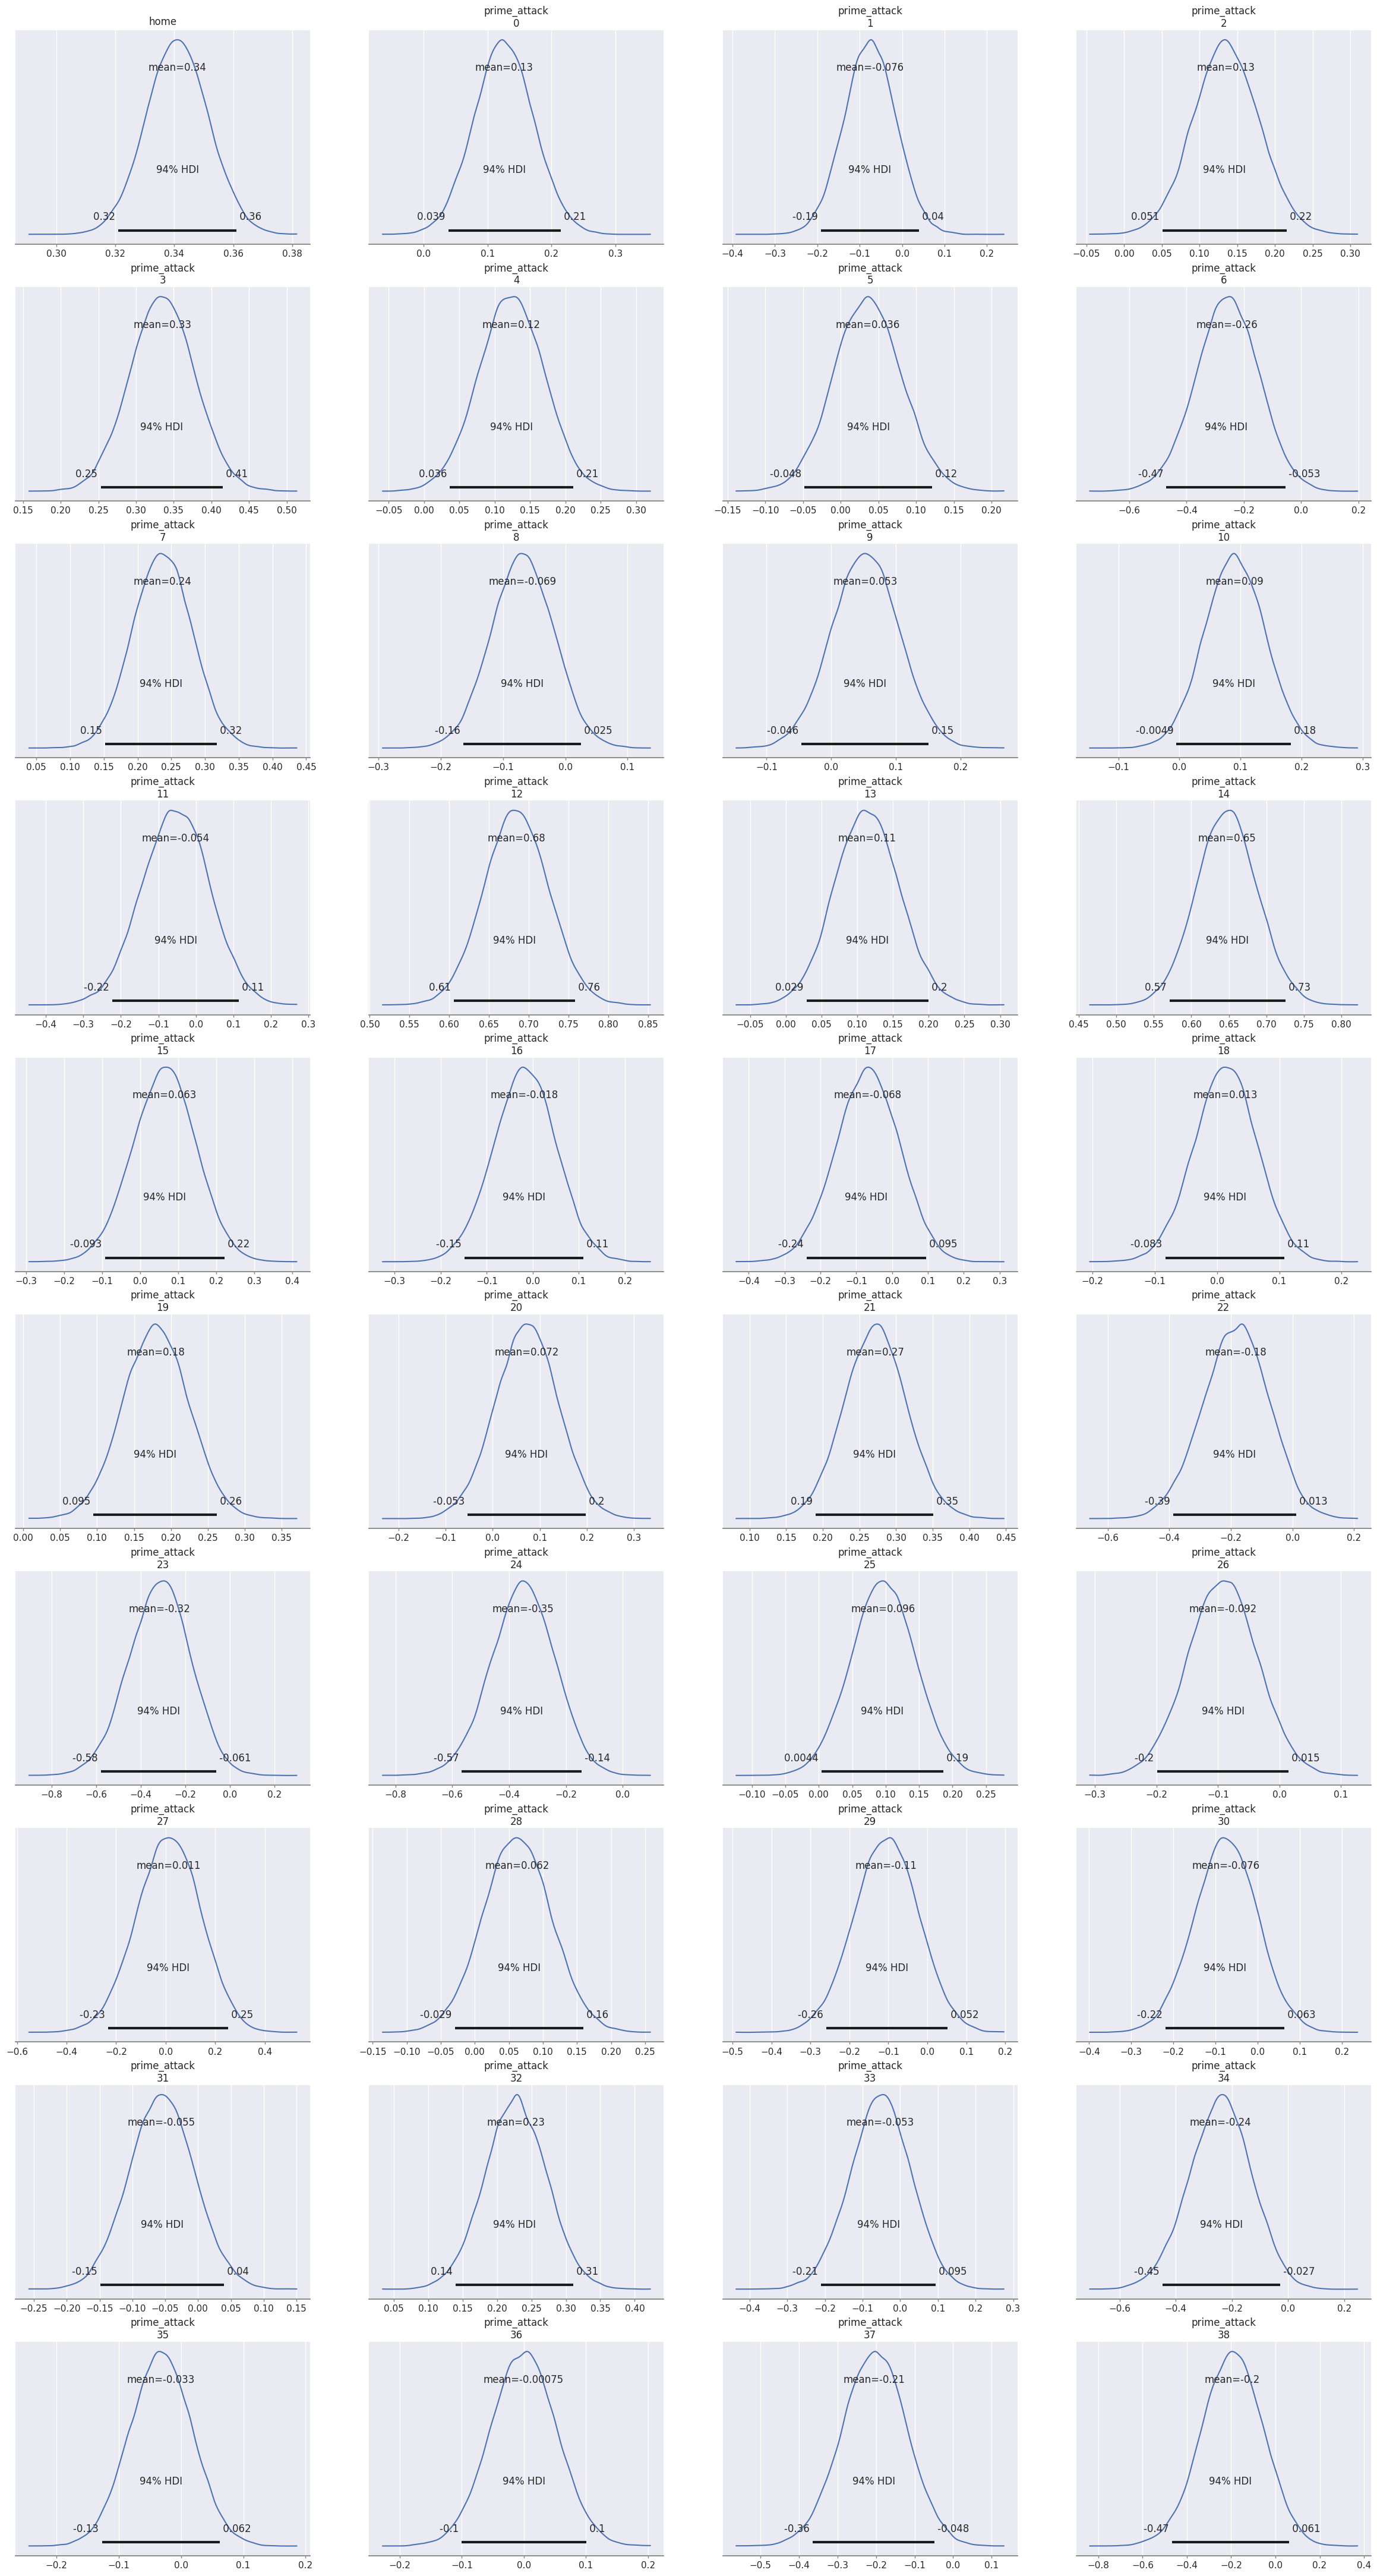

In [ ]:
pm.plot_posterior(trace)

# Calculating Goals For and Against for Home and Away Teams

In [ ]:
for_goals = np.zeros(num_teams)
against_goals = np.zeros(num_teams)

for index, row in goals_in_df.iterrows():
    for_goals[row['HomeTeam']] += row['FTHG']
    for_goals[row['AwayTeam']] += row['FTAG']
    against_goals[row['HomeTeam']] += row['FTAG']
    against_goals[row['AwayTeam']] += row['FTHG']

# Goals For and Against Calculation with Bayesian Analysis
we'll recalculate the total goals scored (goals for) and total goals conceded (goals against) by each team in the LaLiga matches. This time, we'll consider the Bayesian analysis results for team attack strengths.


In [ ]:
goals_for = np.zeros(num_teams)
goals_against = np.zeros(num_teams)
x=trace.posterior['attack'].values.mean()

for index, row in goals_in_df.iterrows():
    goals_for[row['HomeTeam']] += row['FTHG']
    goals_for[row['AwayTeam']] += row['FTAG']
    goals_against[row['HomeTeam']] += row['FTAG']
    goals_against[row['AwayTeam']] += row['FTHG']

# Visualization of Bayesian Analysis Results and Team Performance

we'll visualize the Bayesian analysis results for team attack and defense strengths alongside team performance metrics, such as goals scored and goals conceded.


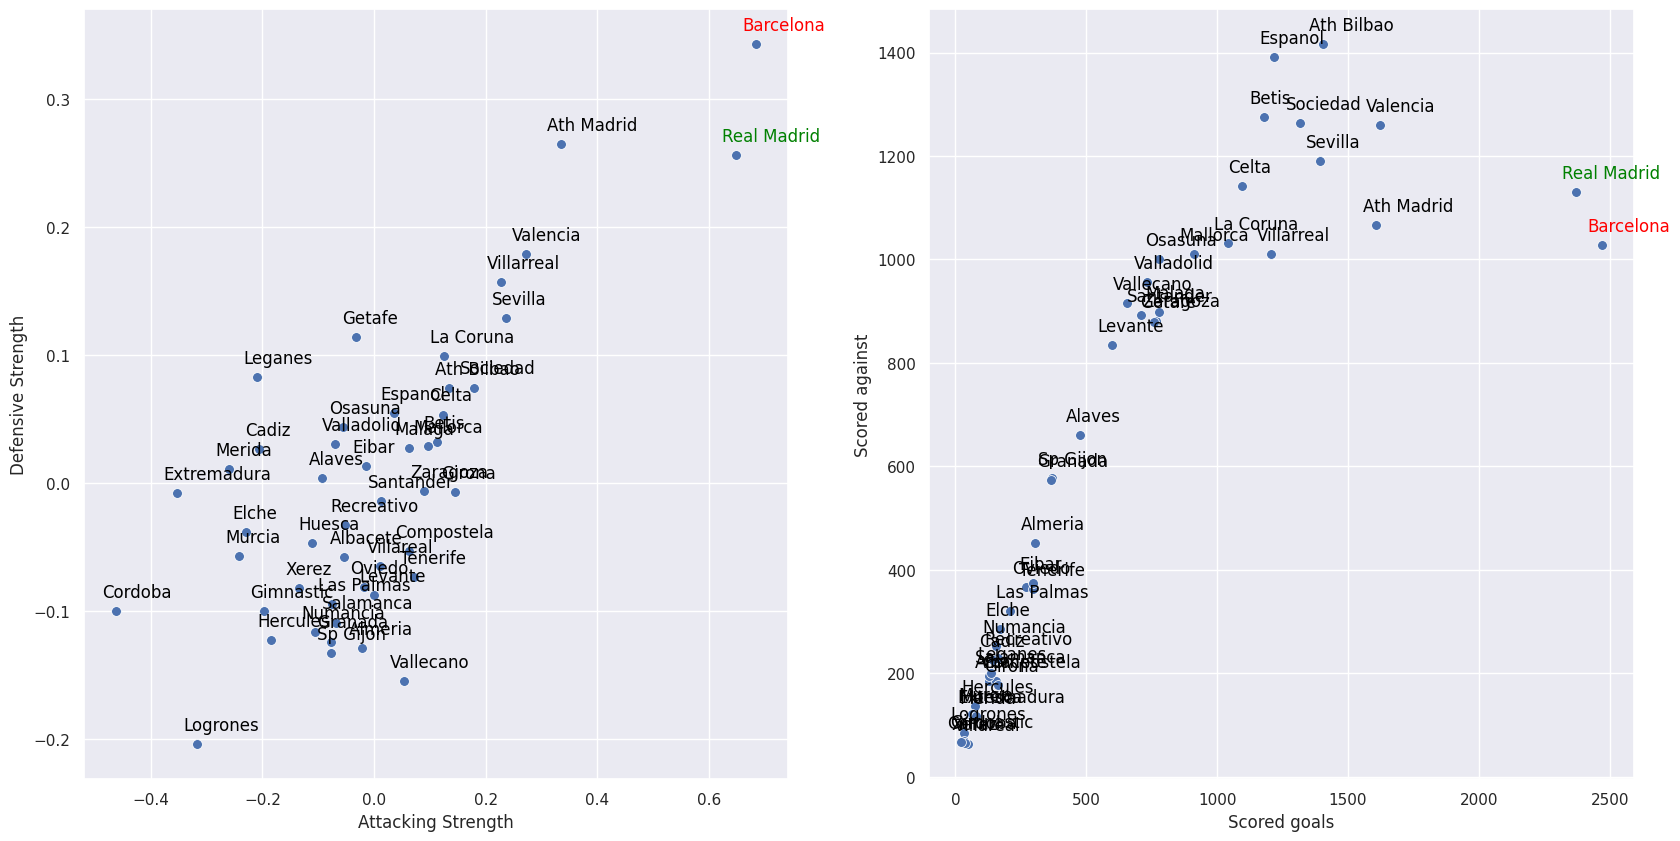

In [ ]:
sns.set()

# Assuming trace, team_names, goals_for, and goals_against are defined in your code
dim_attack = len(trace.posterior['attack'].shape)
dim_defense = len(trace.posterior['defense'].shape)

# Calculate means based on dimensionality
if dim_attack > 2:
    mean_attack = np.mean(trace.posterior['attack'].values, axis=(0, 1))
else:
    mean_attack = trace.posterior['attack'].values.mean(axis=0)

if dim_defense > 2:
    mean_defense = np.mean(trace.posterior['defense'].values, axis=(0, 1))
else:
    mean_defense = trace.posterior['defense'].values.mean(axis=0)

# Plot with single-dimensional means
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Increase the figsize
sns.scatterplot(x=mean_attack, y=mean_defense, ax=ax1, s=50)  # Increase marker size

# Annotations with handling for potential array values
ax1.set_xlabel('Attacking Strength')
ax1.set_ylabel('Defensive Strength')

for label, arr_x, arr_y in zip(teams, mean_attack, mean_defense):
    if isinstance(arr_x, np.ndarray):
        x = arr_x[0]  # Access first element if array
    else:
        x = arr_x

    if isinstance(arr_y, np.ndarray):
        y = arr_y[0]  # Access first element if array
    else:
        y = arr_y

    # Tuple formatting approach for xytext
    xytext = (-10, 10)  # Define offset as tuple with larger values

    if label == 'Real Madrid':
        clr = 'green'
    elif label == 'Barcelona':
        clr = 'red'
    else:
        clr = 'black'

    ax1.annotate(label, xy=(x, y), xytext=xytext, textcoords='offset points', color=clr)

# Second scatter plot
sns.scatterplot(x=for_goals, y=against_goals, ax=ax2, s=50)  # Increase marker size

ax2.set_xlabel('Scored goals')
ax2.set_ylabel('Scored against')

for label, x, y in zip(teams, for_goals, against_goals):
    if label == 'Real Madrid':
        clr = 'green'
    elif label == 'Barcelona':
        clr = 'red'
    else:
        clr = 'black'

    ax2.annotate(label, xy=(x, y), xytext=(-10, 10), textcoords='offset points', color=clr)

plt.show()

In [ ]:
with model:
    #pp_trace = pm.sample_ppc(trace)
    pp_trace = pm.sample_posterior_predictive(trace)

In [ ]:
pp_trace.posterior_predictive['y_Home'].shape

(2, 20000, 10883)

In [ ]:
trace_home = pp_trace.posterior_predictive['y_Home'][1][0]
trace_away = pp_trace.posterior_predictive['y_Away'][1][0]

In [ ]:
home_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * home_won
        for i, home_won in enumerate(trace_home > trace_away)
})
home_sim_df.insert(0, 'teams', goals_df['HomeTeam'])

away_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * away_won
        for i, away_won in enumerate(trace_home < trace_away)
})
away_sim_df.insert(0, 'teams', goals_df['AwayTeam'])

In [ ]:
home_sim_df

,teams,sim_points_0,sim_points_1,sim_points_2,sim_points_3,sim_points_4,sim_points_5,sim_points_6,sim_points_7,sim_points_8,...,sim_points_10873,sim_points_10874,sim_points_10875,sim_points_10876,sim_points_10877,sim_points_10878,sim_points_10879,sim_points_10880,sim_points_10881,sim_points_10882
0,La Coruna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sp Gijon,0,3,0,0,0,3,3,3,0,...,0,3,0,3,3,0,0,3,0,3
2,Ath Bilbao,3,3,0,3,3,3,3,3,0,...,0,3,0,3,3,3,3,3,3,3
3,Ath Madrid,3,3,0,3,3,3,3,3,0,...,0,3,0,3,3,3,3,3,3,3
4,Celta,0,3,0,0,0,0,3,3,0,...,0,3,0,3,3,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,Almeria,0,3,0,0,0,0,3,3,0,...,0,3,0,3,3,0,0,3,0,0
10879,Alaves,3,3,0,3,3,3,3,3,0,...,0,3,0,3,3,3,3,3,3,3
10880,Ath Madrid,0,3,0,0,0,3,3,3,0,...,0,3,0,3,3,0,0,3,0,3
10881,Betis,0,3,0,0,0,3,3,3,0,...,0,3,0,3,3,0,0,3,0,3


In [ ]:
sim_table = (home_sim_df.groupby('teams')
                        .sum()
                        .add(away_sim_df.groupby('teams')
                                        .sum())
                        .rank(ascending=False, method='min', axis=0)
                        .reset_index()
                        .melt(id_vars='teams', value_name='rank')
                        .groupby('teams')
                        ['rank']
                        .value_counts()
                        .unstack(level='rank')
                        .fillna(0)
                        .div(1000))

In [ ]:
sim_table

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0
teams,,,,,,,,,,,,,,,,,,,,,
Alaves,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Albacete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Almeria,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ath Bilbao,0.033,0.000,0.284,1.954,5.120,0.000,3.492,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ath Madrid,0.000,0.000,6.059,2.553,1.356,0.915,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Barcelona,2.870,8.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Betis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.330,2.553,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cadiz,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Celta,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.271,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


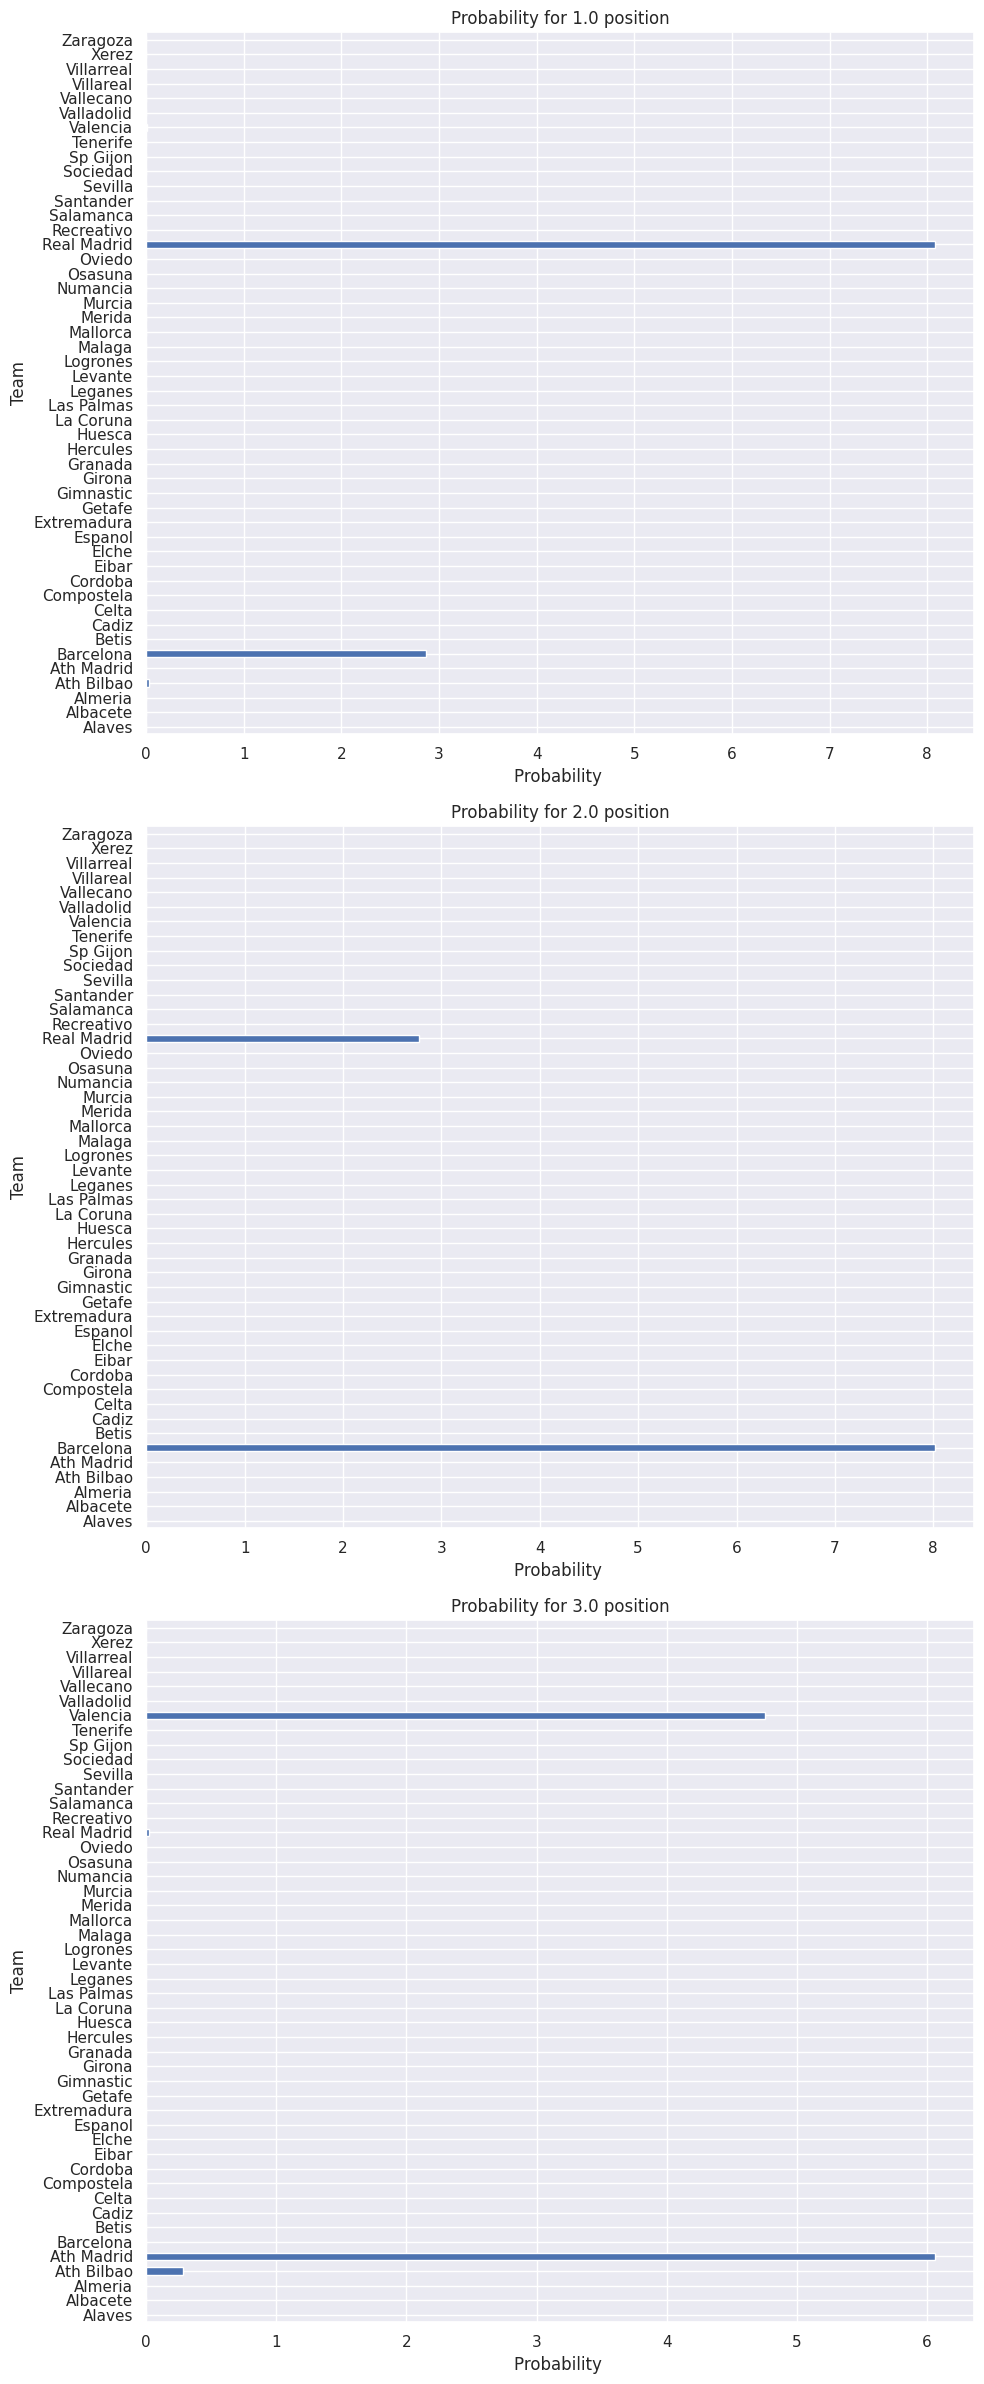

In [ ]:
import matplotlib.pyplot as plt

# Assuming sim_table is your DataFrame

# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 24))

# Iterate over the columns (1.0, 2.0, 3.0)
for i, column in enumerate([1.0, 2.0, 3.0]):
    ax = axes[i]  # Select the current subplot
    sim_table.loc[:, column].plot(kind='barh', ax=ax)
    ax.set_title(f'Probability for {column} position')
    ax.set_xlabel("Probability ")
    ax.set_ylabel("Team")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
